<h1 align="center">UNIVERSIDADE ESTADUAL DE CAMPINAS</h1> 

<h1 align="center">INSTITUTE OF COMPUTING</h1> 

<h2 align="center">Machine Learninng</h2> 
<h2 align="center">MC886A/MO444A</h2> 


- Luis Bernal Chahuayo (RA 234923)
- Jarol Butron Soria (RA 234833)

# 1. Introduction
<p>Clustering allows us to be able to group a set of objects into subsets of objects called clusters, each cluster is made up of a collection of objects that are similar to each other, but that are different from the objects of other clusters. It can be used for the diagnosis of diseases through images, in the monitoring of social networks, marketing. Clustering is part of unsupervised learning, there are some clustering methods such as k-means, hierarchical clustering, K-medoids, DBSCAN, Hierarchical Clustering, etc.</p>

# 2. Clustering Methods

## 2.1 K-Means

lorem ipsum dolor sit ammet 
asdfasdf 
asdfasd

In [13]:
"""
    args:
        k : Number of clusters
        x : Dataset X-axis
        y : Dataset Y-axis
        x_min: 
        x_max:
        y_min: 
        y_max: 

    returns:
        punto_x,
        punto_y,
        matriz_clusters,
        distortion
"""
def kmeans(k,x,y):
    
    # Find min and max values    
    x_min=np.min(x)
    x_max=np.max(x)
    y_min=np.min(y)
    y_max=np.max(y)
   
    # Select K Random Points
    punto_x=np.random.uniform(low=x_min,high=x_max,size=k)
    punto_y=np.random.uniform(low=y_min,high=y_max,size=k)
    
    # Setting a huge distortion
    # Used to stop algorithm
    old_distortion = np.inf

    for it in range(20):
        # Create distance matrix
        matriz_distancias = np.zeros((len(x),k))
        for k_i in range(k):
            # Euclidean distance
            x_h=(x-punto_x[k_i])**2
            y_h=(y-punto_y[k_i])**2
            dist= np.sqrt(x_h+y_h)
            matriz_distancias[:,k_i]=dist

        # Find the minimum distance. Creation of mask matrix
        min=np.argmin(matriz_distancias,axis=1)
        matriz_clusters=np.zeros(matriz_distancias.shape)
        i=0
        for min_i in min:
            matriz_clusters[i][min_i]=1
            i+=1

        # Column matrix transformation
        x_r=x.reshape(-1,1)
        y_r=y.reshape(-1,1)

        # Sum of cluster values
        matriz_clusters_x=x_r*matriz_clusters
        matriz_clusters_y=y_r*matriz_clusters

        total=matriz_clusters.sum(axis=0)

        total_x=matriz_clusters_x.sum(axis=0)
        total_y=matriz_clusters_y.sum(axis=0)

        # Update point with mean total_x
        punto_x=(total_x/ (total+0.0000000001) )
        punto_y=(total_y/ (total+0.0000000001) )

        # Cluster list
        clusters = np.argmax(matriz_clusters,axis=1)
        centroides_x = np.matmul(matriz_clusters,punto_x)
        centroides_y = np.matmul(matriz_clusters,punto_y)
        
        distortion = Distortion(x,y,centroides_x,centroides_y)
        
        # Distortion - Condition
        if ( abs( old_distortion - distortion ) <= 0.001 ): 
            break
        else: old_distortion = distortion


    print ( "\n \n DISTORTION =",distortion, "Clusters=", k)
    plt.scatter(x,y,marker="o",c=clusters)
    plt.scatter(punto_x,punto_y,marker="*",c="red")
    plt.show()

    return punto_x,punto_y,matriz_clusters,distortion


## 2.2 DBSCAN

Explicar que hace el dbscan o como funciona



- args:
    - k : Number of clusters
    - x : Dataset X-axis
    - y : Dataset Y-axis
    - x_min: 
    - x_max:
    - y_min: 
    - y_max: 

- returns:
    - punto_x,
    - punto_y,
    - matriz_clusters,
    - distortion



In [14]:

"""
    args:
        k : Number of clusters
        x : Dataset X-axis
        y : Dataset Y-axis
        x_min: 
        x_max:
        y_min: 
        y_max: 

    returns:
        punto_x,
        punto_y,
        matriz_clusters,
        distortion
"""
def dbscan(x,y, radio, M ):
    marcas = np.zeros( x.shape )
   

    # Repeat until all points are visited
    while( True ):
        
        por_procesar = np.where( marcas == 0)
        if ( len ( por_procesar[0] ) == 0): break

        # Choose a point not visited 
        p_index = por_procesar[0][0] 
        punto_x = x[p_index]
        punto_y = y[p_index]

        # Get Distances 
        distancias = np.sqrt ( ( x - punto_x )**2 + ( y - punto_y )**2 )

        # Select points that are neighboors from the choose point

        n_vecinos = len ( distancias[ distancias < radio ]  )

        # Classify 
        # 0 No worked 
        # 1 Core Point
        # 2 Border
        # 3 Outlier

        if  n_vecinos >= M:
            marcas[p_index] = 1
        elif n_vecinos > 0 : 
            marcas[p_index] = 2
        else: 
            marcas[p_index] = 3
    
    # -1 : No cluster
    clusters = -1 * np.ones ( marcas.shape )

    visitados = np.zeros ( marcas.shape  , dtype=bool)
    
    
    core_points = np.where(marcas == 1)[0]
    n_cluster = 0

    # Repeat until all core points have been visited 
    while ( True ):
        if ( len(core_points) == 0 ) : break
        if  len(  np.where ( ( ~ visitados ) & ( clusters != -1  ) & ( marcas == 1 ) )[0]  ) == 0:
            
            #
            c_p_x = x[core_points[0]]
            c_p_y = y[core_points[0]]
            visitados[ core_points[0] ] = 1 
            distancias = np.sqrt ( ( x - c_p_x )**2 + ( y - c_p_y )**2 )
            clusters[ np.where(distancias < radio)  ] = n_cluster 
            core_points = core_points[ 1 : ]
            n_cluster += 1 
        else:
            # 
            core_points_nuevos = np.where ( ( ~ visitados ) & ( clusters != -1  ) & ( marcas == 1 ) )[0]      
            c_p_x = x[core_points_nuevos[0]]
            c_p_y = y[core_points_nuevos[0]]
            visitados[ core_points_nuevos[0] ] = 1 
            distancias = np.sqrt ( ( x - c_p_x )**2 + ( y - c_p_y )**2 )
            clusters[ np.where(distancias < radio)  ] = clusters[ core_points_nuevos[0] ]
            core_points = np.delete(core_points, np.where( core_points == core_points_nuevos[0] ))
    
    # print ( clusters )

    print("\n \nBorders and Core Points")
    plt.scatter(x,y,c=marcas)
    plt.show()

    print("Final Clusters formed")
    plt.scatter(x,y,c=clusters)
    plt.show()

    return clusters 

# 3. Evaluation Metrics 

## 3.1 Distortion

$$
SSE=\sum_{i=1}^{m} {(y_i - \hat{y_i})}^{2}
$$

In [15]:
def Distortion(x,y,centroides_x,centroides_y):
    distortion = ( ( x - centroides_x )**2 + ( y - centroides_y )**2 ).sum()
    return distortion

## 3.2 RMSSTD

- Root mean squared error standard deviation (RMSSTD)

$$
RMSSTD= \sqrt{\frac{{\sum_i}{\sum_{x{\in}c_i}}{{\parallel x-c_i\parallel}}^{2}}{p.{\sum_i (n_i - 1)}}}
$$


In [16]:
def RMSSTD(x,y,punto_x,punto_y,matriz_clusters,k):
    centroides_x = np.matmul(matriz_clusters,punto_x)
    centroides_y = np.matmul(matriz_clusters,punto_y)
    distortion = Distortion(x,y,centroides_x,centroides_y)
    number_attributes = 2 * ( len(x) - k )
    return np.sqrt(distortion/number_attributes)

## 4. Dataset 1: clusters.dat 
### 4.1 Load Datasets


In [17]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

df = pd.read_table("cluster.dat",header=None, sep="\s+")
datos = pd.DataFrame(df)
datos


,0,1
0,1555.0,28.65
1,1490.0,27.55
2,1445.0,28.35
3,1415.0,28.80
4,1375.0,28.05
...,...,...
568,3420.0,27.95
569,3465.0,26.85
570,3525.0,26.00
571,3570.0,26.15


- Transforming the dataset to a numpy array


In [18]:
datos=datos.to_numpy()
datos

array([[1555.  ,   28.65],
       [1490.  ,   27.55],
       [1445.  ,   28.35],
       ...,
       [3525.  ,   26.  ],
       [3570.  ,   26.15],
       [3440.  ,   25.6 ]])

## 4.2 Split Dataset (Train/test)


- Shuffle data

In [19]:
np.random.shuffle(datos)
datos

array([[1875.  ,    9.55],
       [1005.  ,   25.95],
       [1375.  ,   28.05],
       ...,
       [3440.  ,   21.25],
       [3175.  ,   20.75],
       [ 860.  ,   25.65]])

- Split data in training/test sets (90/10) 

In [20]:
datos_train = datos[:int(0.9*len(datos))]
datos_test = datos[int(0.9*len(datos)):]

x_train = datos_train[:,0]
y_train = datos_train[:,1]

x_test = datos_test[:,0]
y_test = datos_test[:,1]


## 4.3 Pre-processing
- Normalization (Min Max Scaler)
$$
    x_{scaled} = \frac{( x - x_{min} ) }{ (x_{max}-x_{min}) }
$$
$$
    y_{scaled} = \frac{( y - y_{min} ) }{ (y_{max}-y_{min}) } 
$$

In [21]:
def norm(x,y,x_max,x_min,y_max,y_min):
    x=(x-x_min)/(x_max-x_min) 
    y=(y-y_min)/(y_max-y_min)
    return x,y

# It's important to save original parameters

x_max_train = x_train.max()
x_min_train= x_train.min()
y_max_train = y_train.max()
y_min_train = y_train.min()

x_max_test = x_test.max()
x_min_test = x_test.min()
y_max_test = y_test.max()
y_min_test = y_test.min()

x_n_train, y_n_train = norm(x_train,y_train,x_max_train,x_min_train,y_max_train,y_min_train)
x_n_test, y_n_test = norm(x_test,y_test,x_max_test,x_min_test,y_max_test,y_min_test)

## 4.4 K-means Clustering

### 4.4.1 Choosing the best K: Elbow Method
- Evaluation of different numbers of clusters
asdfasdf 
asdf asdf metodo 


 
 DISTORTION = 86.88558617957106 Clusters= 1


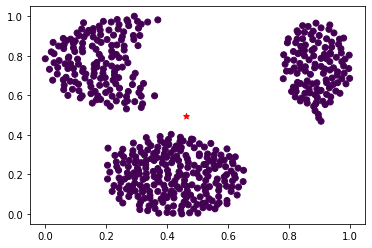


 
 DISTORTION = 47.802637544012 Clusters= 2


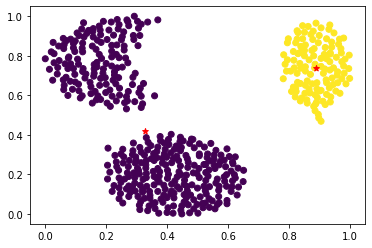


 
 DISTORTION = 11.39122797406608 Clusters= 3


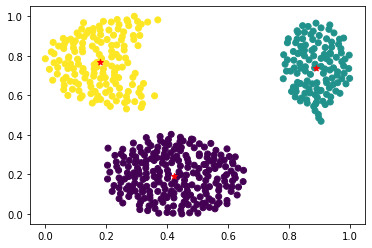


 
 DISTORTION = 9.145662883554591 Clusters= 4


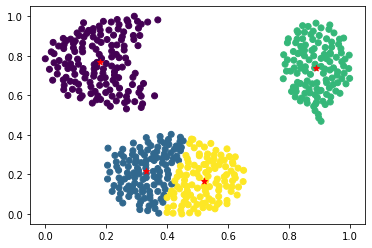


 
 DISTORTION = 7.6961959091710614 Clusters= 5


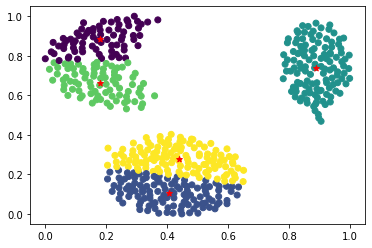


 
 DISTORTION = 6.747791529955854 Clusters= 6


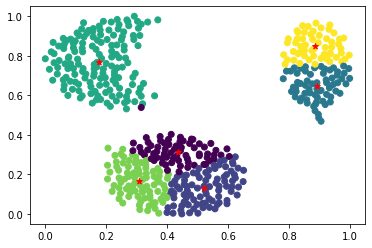


 
 DISTORTION = 4.832437228997043 Clusters= 7


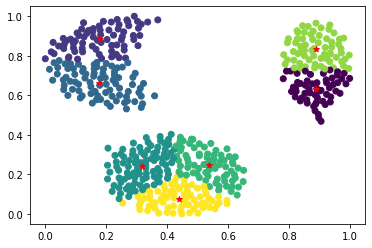


 
 DISTORTION = 5.494200550153914 Clusters= 8


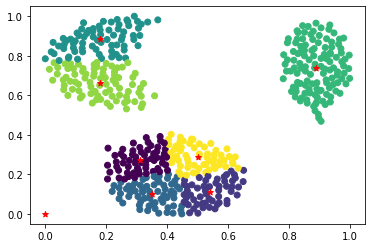


 
 DISTORTION = 3.8548080077922524 Clusters= 9


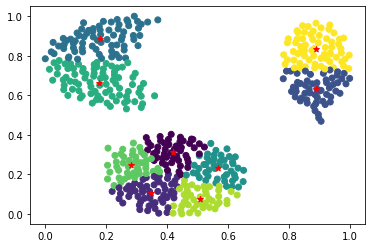


 
 DISTORTION = 3.708176339497837 Clusters= 10


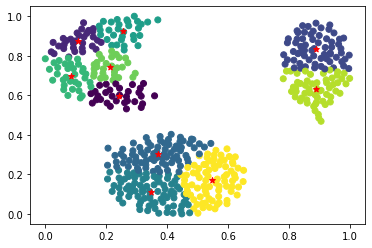


 
 Distortion


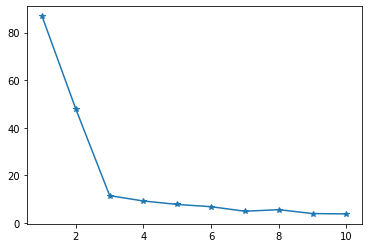

Root Mean Squared Standard Deviation


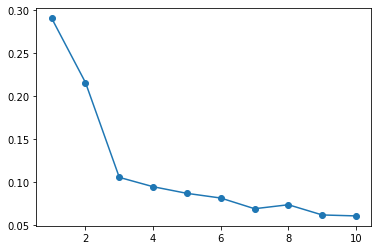

In [22]:
def elbow_method(k_max):
    list_distortions = []
    list_rmmstds = []
    for k in range(1,k_max+1):
        centroide_x , centroide_y , matriz_clusters , distortion = kmeans(k,x_n_train,y_n_train)
        rmmstd = RMSSTD(x_n_train,y_n_train,centroide_x,centroide_y, matriz_clusters, k)
        list_distortions.append(distortion)
        list_rmmstds.append(rmmstd)
    
    print("\n \n Distortion")
    plt.plot(range(1,k_max+1),list_distortions,marker="*")
    plt.show()

    print("Root Mean Squared Standard Deviation")
    plt.plot(range(1,k_max+1),list_rmmstds,marker="o")
    plt.show()


# Execute with until 10 Clusters 
elbow_method(10)

Observing the last graphic ( Elbow Method ), Disttortion and RMSSD.
We choose **k=3**


 
 DISTORTION = 11.39122797406608 Clusters= 3


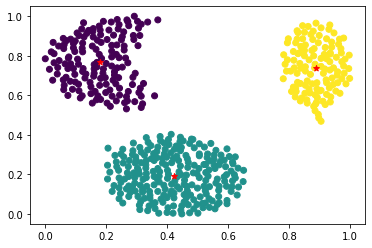

In [27]:
# k = 3 
results = kmeans(3,x_n_train,y_n_train)

Comentario discusión de los resultados obtenidos

## 4.5 DBSCAN
It's not necessary to choose a K, becuase the algorithms finds it by himself. But other parameters must be chosen: Min_neighboors, radio_distance


 
Borders and Core Points


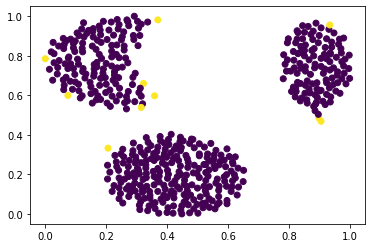

Final Clusters formed


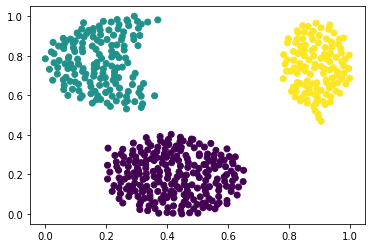

In [28]:
results_dbscan = dbscan(x_n_train, y_n_train, 0.07 , 9 )

# 5. Dataset 2: Vehicles Silohuetes

## 5.1 Loading Dataset 

In [25]:
d = pd.read_table("temp/merge-data",delimiter=" ",header=None)

# Clean data 
del d[19] 
datos = pd.DataFrame(d).dropna()

color (array([0, 0, 0, ..., 5, 1, 2], dtype=int64), array(['MIT', 'NUC', 'CYT', 'ME1', 'EXC', 'ME2', 'ME3', 'VAC', 'POX',
       'ERL'], dtype=object))


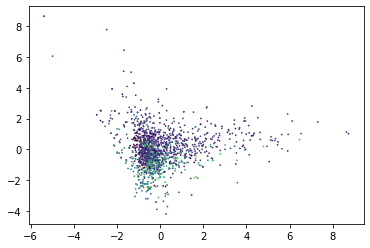

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
